In [22]:
# install tensorflow
%pip install tensorflow -q

In [23]:
# import necessary libraries and modules
from tensorflow import keras
from sklearn.linear_model import Perceptron


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [36]:
  # normalize the pixel values of traning and test images
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test/ 255.0

<Figure size 640x480 with 0 Axes>

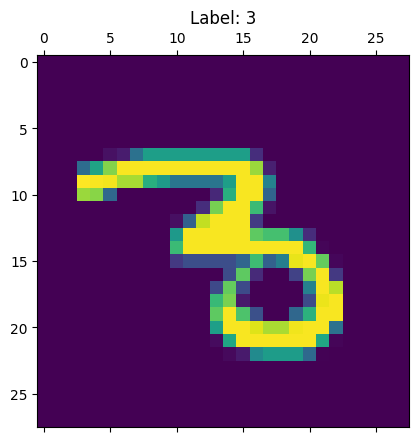

<Figure size 640x480 with 0 Axes>

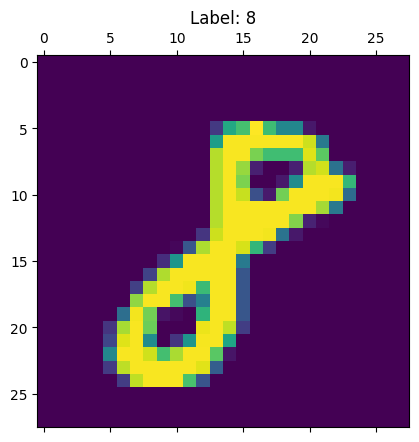

<Figure size 640x480 with 0 Axes>

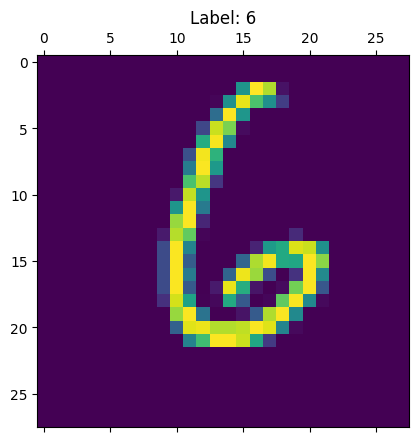

<Figure size 640x480 with 0 Axes>

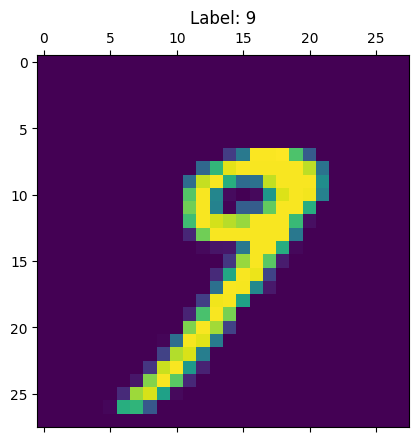

<Figure size 640x480 with 0 Axes>

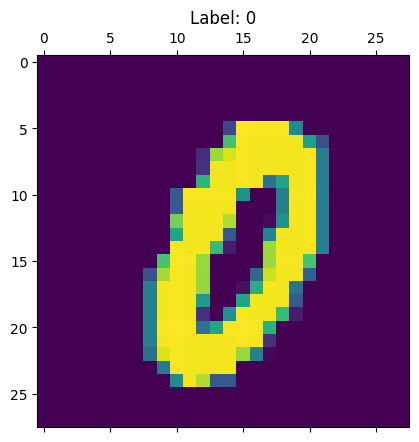

In [24]:
# loop through the range of 5 images in the training datasets
for i in range(30, 35):
    plt.figure()
    plt.matshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")


In [25]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

perceptron = Perceptron()
perceptron.fit(x_train_flat, y_train)

print(f"Training data score: {perceptron.score(x_train_flat, y_train)}")
print(f"Test data score: {perceptron.score(x_test_flat, y_test)}")

Training data score: 0.8853833333333333
Test data score: 0.8805


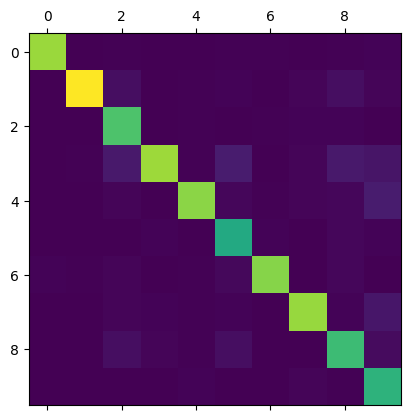

In [26]:
plt.matshow(confusion_matrix(perceptron.predict(x_test_flat), y_test))

In [27]:
#model architecture
model = keras.models.Sequential([
  keras.layers.Dense(10, activation='softmax')

])

# loss function
LOSS_FN = keras.losses.sparse_categorical_crossentropy

# compile the model
model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

# train the model
model.fit(x_train_flat, y_train, epochs=5, validation_data=(x_test_flat, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8125 - loss: 0.7254 - val_accuracy: 0.9151 - val_loss: 0.3060
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9104 - loss: 0.3154 - val_accuracy: 0.9224 - val_loss: 0.2812
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9213 - loss: 0.2813 - val_accuracy: 0.9240 - val_loss: 0.2739
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9251 - loss: 0.2680 - val_accuracy: 0.9253 - val_loss: 0.2695
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9272 - loss: 0.2631 - val_accuracy: 0.9225 - val_loss: 0.2716


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


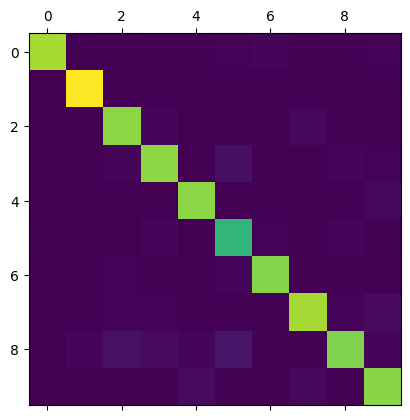

In [28]:
plt.matshow(confusion_matrix(model.predict(x_test_flat).argmax(axis=1), y_test))

In [29]:
modelNames = [
  '1d',
  '2d',
  '3d',
  '1c1d',
  '1c2d',
  '2c2d'
]

NODES_PER_HIDDEN_LAYER = 64

In [30]:

models = [keras.models.Sequential(
    [keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
]),

# 1 hidden layer
keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
]),

# 2 hidden layers
keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
]),

#1 convolutional layer
keras.models.Sequential([
  keras.Input(shape=(28, 28, 1)),
  keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation='softmax')
]),

#1 convolutional layer and 1 hidden layer
keras.models.Sequential([
  keras.Input(shape=(28, 28, 1)),
  keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
]),

#2 convolutional layers and 2 hidden layers
keras.models.Sequential([
  keras.Input(shape=(28, 28, 1)),
  keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation='relu'),
  keras.layers.Conv2D(NODES_PER_HIDDEN_LAYER, kernel_size=(3, 3), activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])
]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
#compile all models
for model in models:
  model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

In [32]:
TRAINING_EPOCHS = 5

#train all models
for model, name in zip(models, modelNames):
  print(f"Training {name}...")
  model.fit(x_train, y_train, epochs=TRAINING_EPOCHS, validation_data=(x_test, y_test))

Training 1d...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8167 - loss: 0.7084 - val_accuracy: 0.9141 - val_loss: 0.3087
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9137 - loss: 0.3107 - val_accuracy: 0.9209 - val_loss: 0.2845
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9207 - loss: 0.2871 - val_accuracy: 0.9251 - val_loss: 0.2715
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9233 - loss: 0.2743 - val_accuracy: 0.9253 - val_loss: 0.2721
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9260 - loss: 0.2640 - val_accuracy: 0.9275 - val_loss: 0.2668
Training 2d...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8669 - loss: 0.4864 - val_accuracy: 0.9530 - val_loss: 0.1664
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9573 - loss: 0.1489 - val_accuracy: 0.9660 - val_loss: 0.1183
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 

In [33]:
# get all model accuracy sc ores on test data
scores = [model.evaluate(x_test, y_test)[1] for model in models]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9167 - loss: 0.3023
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9684 - loss: 0.1072
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9692 - loss: 0.1022
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9767 - loss: 0.0851
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9776 - loss: 0.0886
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.9854 - loss: 0.0562


In [34]:
modelNames.insert(0, "Perceptron")
scores.insert(0, perceptron.score(x_test_flat, y_test))

for name, score in zip(modelNames, scores):
  print(f"{name}: {score}")

Perceptron: 0.8805
1d: 0.9275000095367432
2d: 0.9731000065803528
3d: 0.9745000004768372
1c1d: 0.979200005531311
1c2d: 0.9821000099182129
2c2d: 0.9886000156402588


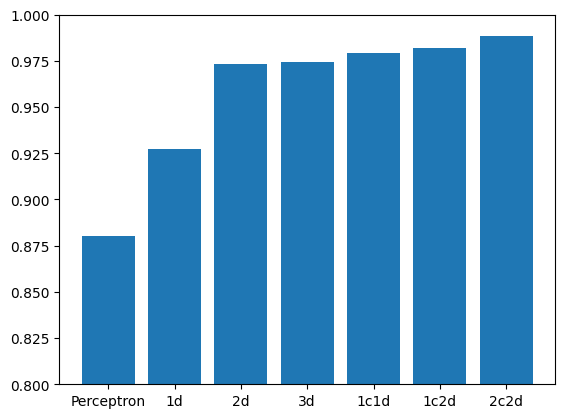

In [35]:
plt.bar(modelNames, scores)
plt.ylim(0.8, 1.0)
plt.show()